### Problem Statement

You have been provided with a dataset named **`"heart_failure_clinical_records.csv"`** which includes various clinical parameters of patients. The dataset comprises the following columns:

- age: Age of the patient (years)
- anaemia: Decrease of red blood cells or hemoglobin (boolean)
- creatinine_phosphokinase: Level of the CPK enzyme in the blood (mcg/L)
- diabetes: If the patient has diabetes (boolean)
- ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)
- high_blood_pressure: If the patient has hypertension (boolean)
- platelets: Platelets in the blood (kiloplatelets/mL)
- serum_creatinine: Level of serum creatinine in the blood (mg/dL)
- serum_sodium: Level of serum sodium in the blood (mEq/L)
- sex: Sex of the patient (binary, 1 for male, 0 for female)
- smoking: If the patient smokes or not (boolean)
- time: Follow-up period (days)
- death_event: If the patient died during the follow-up period (boolean)

Your task is to use this dataset to build and evaluate machine learning models to predict heart failure events. You will perform data preprocessing, exploratory data analysis, and model training using GaussianNB, SVM, and XGBoost. Additionally, you will use ROC curves to analyze model performance and make cost-benefit decisions.

**Dataset credits:** Heart Failure Clinical Records. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5Z89R.



**Import Necessary Libraries**

In [25]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


### Task 1: Data Preprocessing and Exploratory Data Analysis

1. Import the data from the `"heart_failure_clinical_records.csv"` file and store it in a DataFrame.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for missing values and handle them appropriately.
5. Perform basic statistical analysis and visualization to understand the distribution of each feature.
    - Use `histograms` for continuous features (age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time).
    - Use `bar plots` for binary features (anaemia, diabetes, high_blood_pressure, sex, smoking).

In [2]:

# Import the data from the "heart_failure_clinical_records.csv" file and store it in a DataFrame.
df = pd.read_csv("datasets\\heart_failure_clinical_records.csv")


# Display the number of rows and columns in the dataset.
print(df.shape)


# Display the first few rows of the dataset to get an overview
df.sample(7)

(5000, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
3621,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
4841,70.0,0,1202,0,50,1,358000.00,0.90,141,0,0,196,0
1101,45.0,0,110,1,60,0,742000.00,0.80,138,0,0,278,0
757,60.0,0,53,0,50,1,283000.00,2.30,143,0,0,87,0
1615,45.0,1,981,0,30,0,136000.00,1.10,137,1,0,11,1
2242,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
4105,75.0,0,582,0,45,1,263358.03,1.18,137,1,0,87,0


In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  death_event               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [5]:
# Check for missing values and handle them appropriately.
df.isna().sum()


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

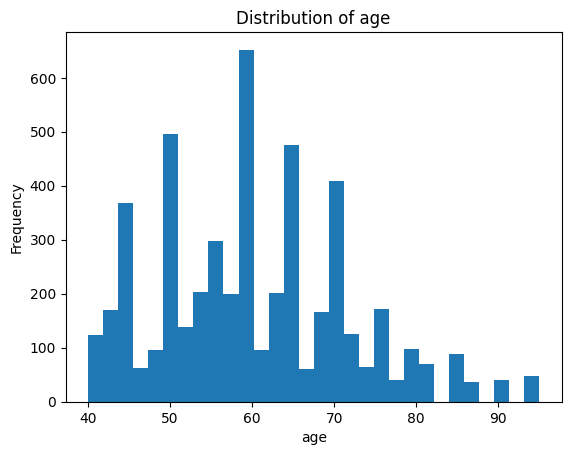

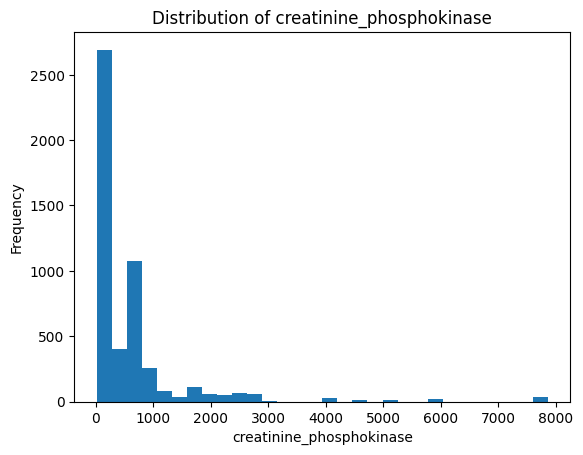

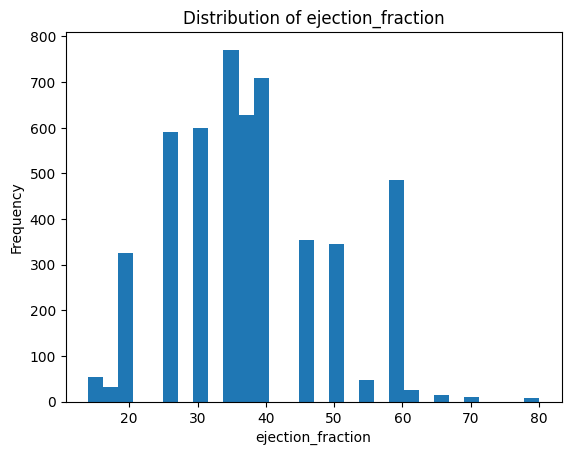

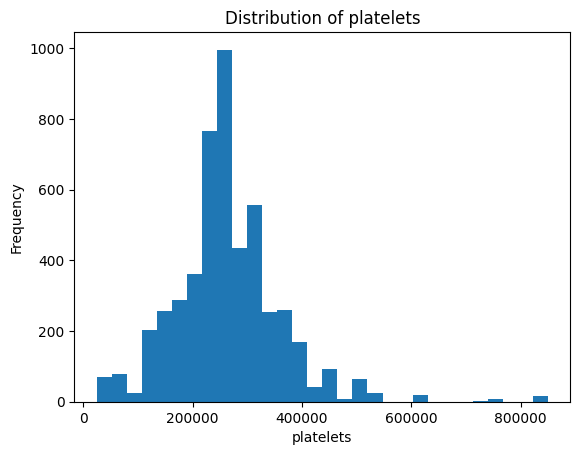

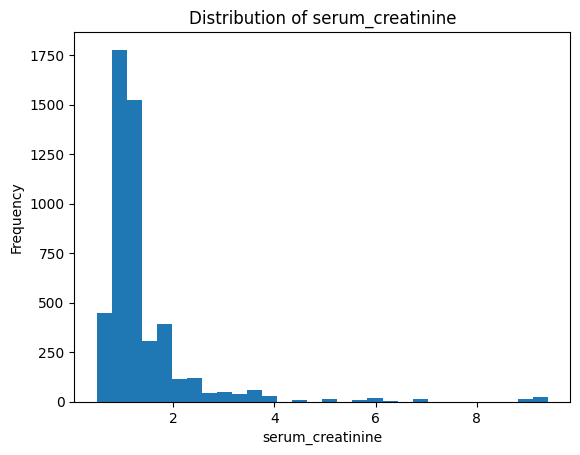

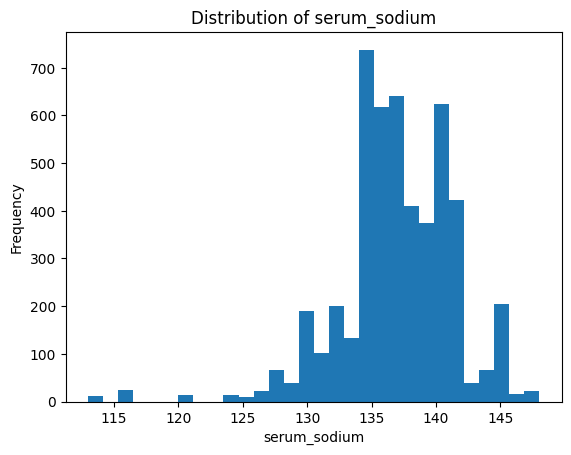

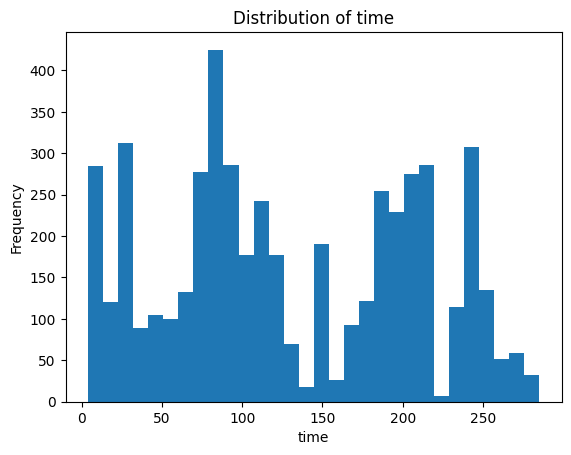

In [8]:
# Perform basic statistical analysis and visualization to understand the distribution of each feature

#i) Histograms for continuous features (age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time).
features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

for feature in features:
    df[feature].plot(kind="hist", bins=30)
    plt.xlabel(feature)
    plt.title(f"Distribution of {feature}")
    plt.show()

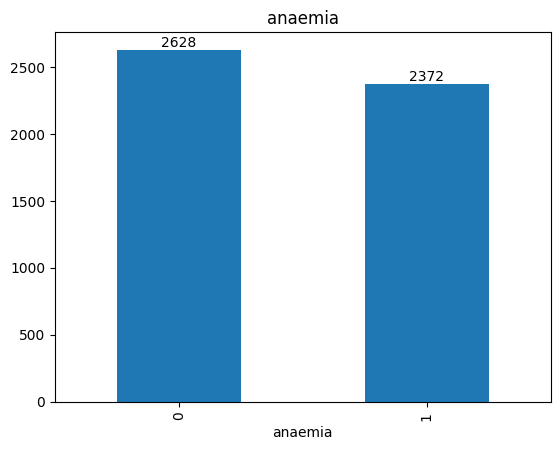

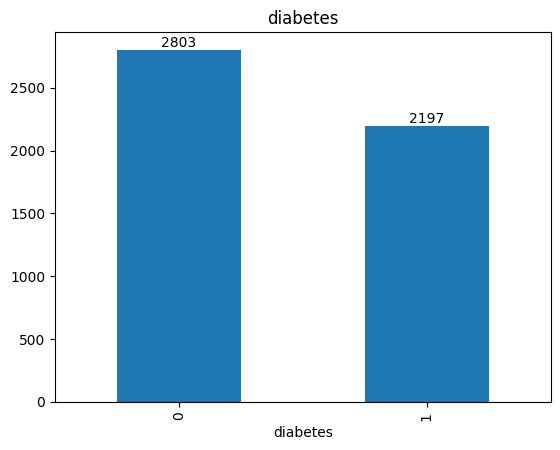

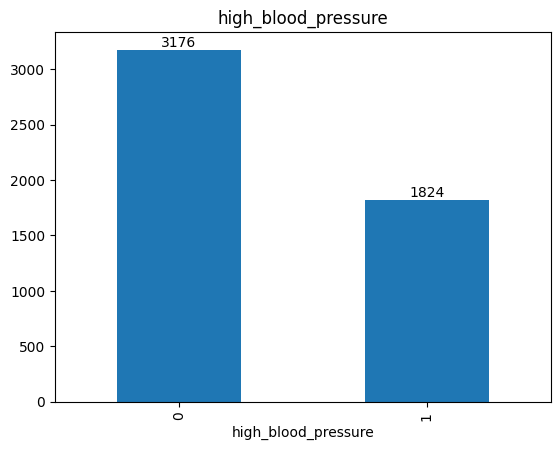

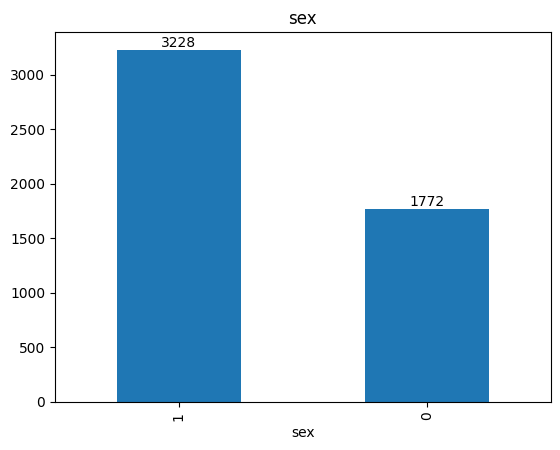

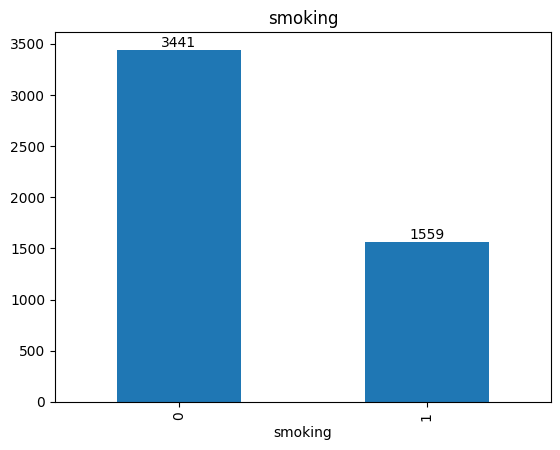

In [12]:
# Bar plots for binary features (anaemia, diabetes, high_blood_pressure, sex, smoking).
bar_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

for bf in bar_features:
    ax = df[bf].value_counts().plot(kind="bar")
    plt.title(bf)
    for i in ax.containers:
        ax.bar_label(i)
    plt.show()

### Task 2: Feature Transformation

1. Split the dataset into training and test sets with a test size of 25%.
2. Normalize continuous features (age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time) using StandardScaler.

In [38]:
# Split the dataset into training and test sets
X = df.drop("death_event", axis=1)
y = df["death_event"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)



In [39]:
# Normalize continuous features using StandardScaler
scaler = StandardScaler()
X_train[features] = scaler.fit_transform(X_train[features])
X_test[features] = scaler.transform(X_test[features])



### Task 3: Model Training and Evaluation with GaussianNB

1. Initialize and train a `GaussianNB` model using the training data.
2. Print the classification report to evaluate the model's performance.
3. Calculate the AUC for the GaussianNB model.
4. Find the probability threshold associated with a desired recall of 85% and print the corresponding false positive rate.

In [40]:
# Initialize and train a GaussianNB model
model_gnb = GaussianNB()
model_gnb.fit(X_train, y_train)
y_pred_gnb = model_gnb.predict(X_test)


# Print the classification report
report_gnb = classification_report(y_true=y_test, y_pred=y_pred_gnb)

print("training score: ", model_gnb.score(X_train, y_train))
print("test score: ", model_gnb.score(X_test, y_test))
scores = cross_val_score(model_gnb, X, y, cv=5)
print("Actual scores: ", scores)
print("CV Mean: ", np.mean(scores), " std: ",np.std(scores))
print(report_gnb)

training score:  0.7933333333333333
test score:  0.7984
Actual scores:  [0.818 0.814 0.808 0.827 0.831]
CV Mean:  0.8196  std:  0.008404760555780254
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       881
           1       0.75      0.47      0.58       369

    accuracy                           0.80      1250
   macro avg       0.78      0.70      0.72      1250
weighted avg       0.79      0.80      0.78      1250



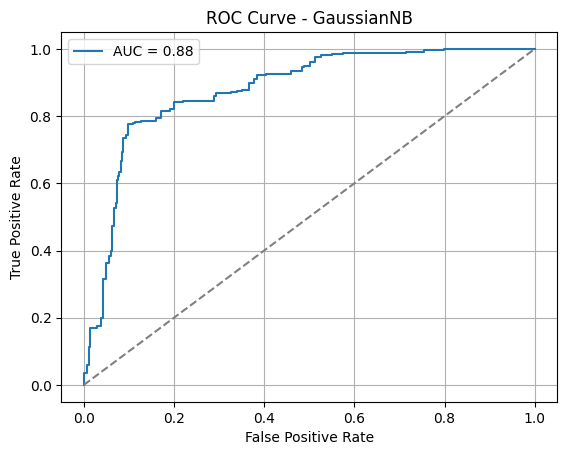

In [45]:
# Calculate the AUC for the GaussianNB model.
probabilities = model_gnb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=probabilities)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # random model line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - GaussianNB")
plt.legend()
plt.grid()
plt.show()

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_score=probabilities, y_true=y_test)

0.8790854196850709

In [58]:
# Find the probability threshold associated with 85% recall
desired_recall = 0.85
min_index = np.argmin(abs(tpr - desired_recall))
print(thresholds[min_index])

desired_y_pred = (probabilities >= thresholds[min_index]).astype(int)
desired_report = classification_report(y_true=y_test, y_pred=desired_y_pred)
print(desired_report)


0.09000947872507015
              precision    recall  f1-score   support

           0       0.92      0.71      0.80       881
           1       0.55      0.85      0.67       369

    accuracy                           0.75      1250
   macro avg       0.73      0.78      0.73      1250
weighted avg       0.81      0.75      0.76      1250



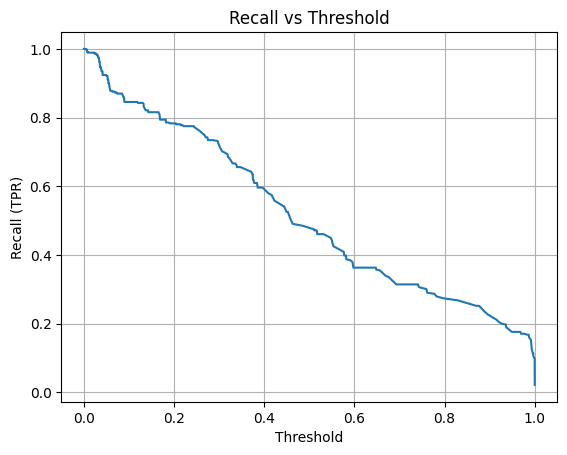

In [60]:
plt.plot(thresholds, tpr)
plt.xlabel("Threshold")
plt.ylabel("Recall (TPR)")
plt.title("Recall vs Threshold")
plt.grid()
plt.show()


### Task 4: Model Training and Evaluation with SVM

1. Initialize and train an `SVM` model with a linear kernel using the training data.
2. Print the classification report to evaluate the model's performance.
3. Calculate the AUC for the SVM model.
4. Find the probability threshold associated with a desired recall of 90% and print the corresponding false positive rate.

In [65]:
# Initialize and train an SVM model with a linear kernel
model_svc = SVC(probability=True)
model_svc.fit(X_train, y_train)
y_pred_svc = model_svc.predict(X_test)


# Print the classification report
r_svc = classification_report(y_true=y_test, y_pred=y_pred_svc)
print(r_svc)


              precision    recall  f1-score   support

           0       0.95      0.97      0.96       881
           1       0.93      0.88      0.91       369

    accuracy                           0.95      1250
   macro avg       0.94      0.93      0.93      1250
weighted avg       0.95      0.95      0.95      1250



In [67]:
# Calculate the AUC
prob_svc = model_svc.predict_proba(X_test)[:,1]
roc_svc = roc_auc_score(y_score=prob_svc, y_true=y_test)
roc_svc


0.9753513653184205

In [71]:
# Find the probability threshold associated with 90% recall
desired_recall_svc = 0.9
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_true=y_test, y_score=prob_svc)

index_svc = np.argmin(abs(tpr_svc - desired_recall_svc))

desired_y_pred_svc = (prob_svc >= thresholds_svc[index_svc]).astype(int)
r_d_svc = classification_report(y_true=y_test, y_pred=desired_y_pred_svc)
print(r_d_svc)


              precision    recall  f1-score   support

           0       0.96      0.95      0.95       881
           1       0.88      0.90      0.89       369

    accuracy                           0.93      1250
   macro avg       0.92      0.92      0.92      1250
weighted avg       0.93      0.93      0.93      1250



### Task 5: Model Training and Evaluation with XGBoost

1. Initialize and train an `XGBoost` model using the training data.
2. Print the classification report to evaluate the model's performance.
3. Calculate the AUC for the XGBoost model.

In [72]:

# Initialize and train an XGBoost model
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
# Print the classification report
r_xgb = classification_report(y_pred=y_pred_xgb, y_true=y_test)
print(r_xgb)



              precision    recall  f1-score   support

           0       0.99      1.00      0.99       881
           1       0.99      0.99      0.99       369

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



In [74]:
def get_model_to_work(X_train, y_train, X_test,y_test, model=XGBClassifier()):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_pred=y_pred, y_true=y_test)
    
    return model,y_pred, report
model, y_pred, report = get_model_to_work(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       881
           1       0.99      0.99      0.99       369

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250



In [77]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

def train_and_evaluate_model(X_train, y_train, X_test, y_test, model=XGBClassifier(random_state=42)):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_true=y_test, y_pred=y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    try:
        proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, proba)
    except:
        auc = None
    
    return {
        "model": model,
        "predictions": y_pred,
        "accuracy": acc,
        "auc": auc,
        "report": report,
        "confusion_matrix": confusion_matrix(y_test, y_pred)
    }

results = train_and_evaluate_model(X_train, y_train, X_test, y_test)
print("Accuracy:", results["accuracy"])
print("AUC:", results["auc"])
print("Classification report:\n", results["report"])



Accuracy: 0.9928
AUC: 0.9991971429362421
Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       881
           1       0.99      0.99      0.99       369

    accuracy                           0.99      1250
   macro avg       0.99      0.99      0.99      1250
weighted avg       0.99      0.99      0.99      1250

